<a href="https://colab.research.google.com/github/dpakkaushik/MachineLearning/blob/main/TFIDF_and_SKLearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font face='georgia'>
    
   <h4><strong>What does tf-idf mean?</strong></h4>

   <p>    
Tf-idf stands for <em>term frequency-inverse document frequency</em>, and the tf-idf weight is a weight often used in information retrieval and text mining. This weight is a statistical measure used to evaluate how important a word is to a document in a collection or corpus. The importance increases proportionally to the number of times a word appears in the document but is offset by the frequency of the word in the corpus. Variations of the tf-idf weighting scheme are often used by search engines as a central tool in scoring and ranking a document's relevance given a user query.
</p>
    
   <p>
One of the simplest ranking functions is computed by summing the tf-idf for each query term; many more sophisticated ranking functions are variants of this simple model.
</p>
    
   <p>
Tf-idf can be successfully used for stop-words filtering in various subject fields including text summarization and classification.
</p>
    
</font>

<font face='georgia'>
    <h4><strong>How to Compute:</strong></h4>

Typically, the tf-idf weight is composed by two terms: the first computes the normalized Term Frequency (TF), aka. the number of times a word appears in a document, divided by the total number of words in that document; the second term is the Inverse Document Frequency (IDF), computed as the logarithm of the number of the documents in the corpus divided by the number of documents where the specific term appears.

 <ul>
    <li>
<strong>TF:</strong> Term Frequency, which measures how frequently a term occurs in a document. Since every document is different in length, it is possible that a term would appear much more times in long documents than shorter ones. Thus, the term frequency is often divided by the document length (aka. the total number of terms in the document) as a way of normalization: <br>

$TF(t) = \frac{\text{Number of times term t appears in a document}}{\text{Total number of terms in the document}}.$
</li>
<li>
<strong>IDF:</strong> Inverse Document Frequency, which measures how important a term is. While computing TF, all terms are considered equally important. However it is known that certain terms, such as "is", "of", and "that", may appear a lot of times but have little importance. Thus we need to weigh down the frequent terms while scale up the rare ones, by computing the following: <br>

$IDF(t) = \log_{e}\frac{\text{Total  number of documents}} {\text{Number of documents with term t in it}}.$
for numerical stabiltiy we will be changing this formula little bit
$IDF(t) = \log_{e}\frac{\text{Total  number of documents}} {\text{Number of documents with term t in it}+1}.$
</li>
</ul>

<br>
<h4><strong>Example</strong></h4>
<p>

Consider a document containing 100 words wherein the word cat appears 3 times. The term frequency (i.e., tf) for cat is then (3 / 100) = 0.03. Now, assume we have 10 million documents and the word cat appears in one thousand of these. Then, the inverse document frequency (i.e., idf) is calculated as log(10,000,000 / 1,000) = 4. Thus, the Tf-idf weight is the product of these quantities: 0.03 * 4 = 0.12.
</p>
</font>

<font face='georgia'>
    <h4><strong>Building a TFIDF Vectorizer & comparing its results with Sklearn:</strong></h4>

<ul>
    <li> As a part of this task you will be implementing TFIDF vectorizer on a collection of text documents.</li>
    <br>
    <li> You should compare the results of your own implementation of TFIDF vectorizer with that of sklearns implemenation TFIDF vectorizer.</li>
    <br>
    <li> Sklearn does few more tweaks in the implementation of its version of TFIDF vectorizer, so to replicate the exact results you would need to add following things to your custom implementation of tfidf vectorizer:
       <ol>
        <li> Sklearn has its vocabulary generated from idf sroted in alphabetical order</li>
        <li> Sklearn formula of idf is different from the standard textbook formula. Here the constant <strong>"1"</strong> is added to both the numerator and denominator of the idf as if an extra document was seen containing every term in the collection exactly once. This is done to avoid divison-by-zero and log(0) ( = undefined) errors.
            
 $IDF(t) = 1+\log_{e}\frac{1\text{ }+\text{ Total  number of documents in collection}} {1+\text{Number of documents with term t in it}}.$
        </li>
        <li> Sklearn applies row-wise L2-normalization on its output matrix. This is primiarly to convert each data point vector to a unit vector. This is done as we often use cosine similarity between such high-dimensional vectors. </li>
        <li> The final output of sklearn tfidf vectorizer is a sparse matrix.</li>
        <li> Sklearn TfidfVectorizer documentation https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
        </li>
    </ol>
    <br>
    <li>Steps to approach this task:
    <ol>
        <li> You would have to write both fit and transform methods for your custom implementation of tfidf vectorizer.</li>
        <li> Print out the alphabetically sorted voacb after you fit your data and check if its the same as that of the feature names from sklearn tfidf vectorizer. </li>
        <li> Print out the idf values from your implementation and check if its the same as that of sklearns tfidf vectorizer idf values. </li>
        <li> Once you get your voacb and idf values to be same as that of sklearns implementation of tfidf vectorizer, proceed to the below steps. </li>
        <li> Make sure the output of your implementation is a sparse matrix. Before generating the final output, you need to normalize your sparse matrix using L2 normalization. You can refer to this link https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.normalize.html </li>
        <li> After completing the above steps, print the output of your custom implementation and compare it with sklearns implementation of tfidf vectorizer.</li>
        <li> To check the output of a single document in your collection of documents,  you can convert the sparse matrix related only to that document into dense matrix and print it.</li>
        </ol>
    </li>
    <br>
   </ul>
   

<font face='georgia'>
    <h4><strong>Normalisation in SkLearn:</strong></h4>

<ul>
  <li>There are two possible ways, Row-wise normalisation and Column-wise normalisation.</li>

<li>That can be done with parameter <strong>axis=0 or axis=1</strong></li>
</ui>

Below is a reference image:

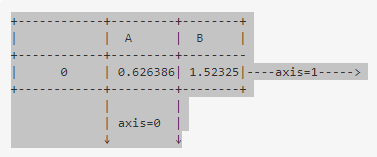



---



In [ ]:
from collections import Counter
from tqdm import tqdm
from scipy.sparse import csr_matrix
import math
from sklearn.preprocessing import normalize
import numpy as np

In [ ]:
corpus = [
     'this is the first document',
     'this document is the second document',
     'and this is the third one',
     'is this the first document',
]

# Custom Implementation

In [ ]:
class CustomTfidfVectorizer:
    
    """ Contains methods to implement tfidf vectorizer.
    
    1. Calculating term frequency values and inverse document frequency values.
    2. Creating fit and transform methods
    
    """
    
    def __init__(self):
      # Initialising an empty dictionary to store all the unique words in corpus
      # and their idf values. These unique words also form our Vocab.
      self.vocab = {}


    def term_freq(self, doc):
      
      # Splitting a sentence or a document into indiviual words
      bow_doc = doc.split(" ")
      
      # Computing the number of words in a sentence or a document
      doc_len = len(bow_doc)
      
      # Calculating the frequency of each word in the document.
      # The output of counter will be a dictionary, 
      # with word as the key and value as the frequency.
      tf_dict = dict(Counter(bow_doc))
      
      # Calculating term_frequency value for each word in the doucment.
      for key in tf_dict:
        tf_dict[key] = (tf_dict[key]/(doc_len*1.0))
      
      # return tf values for words in a single document
      return tf_dict    


    def inv_doc_freq(self, corpus):
      
      # Initialising an empty dictionary to store all the unique words in the corpus,
      # and also to store their corresponding idf values.
      # In this dict, the words are the keys and their idf are the values of those keys.
      idf_dict = {}

      # Calculating total number of documents in the corpus
      corpus_len = len(corpus)

      for doc in corpus:
        # Splitting a sentence or a document into indiviual words
        bow_doc = doc.split(" ")
        # Creating a set of unique words in the document
        bow_doc = set(bow_doc)
        # Computing the number of documents in which a particular word occured
        for word in bow_doc:
          if word in idf_dict.keys():
            idf_dict[word] += 1
          else:
            idf_dict[word] = 1

      # Computing idf value for each unique word in the corpus
      for word in idf_dict:
        # smoothed idf formula
        idf_dict[word] = 1 + math.log((1+corpus_len)/(1+idf_dict[word]))

      # Creating a Vocabulary dictionary to have sorted vocab alphabetically along with idf values.
      self.vocab = {key : idf_dict[key] for key in sorted(idf_dict)}


    def fit(self, corpus):
      # Checking if the input is of type list and then calculating idf using fit method.
      if isinstance(corpus, (list)):
        self.inv_doc_freq(corpus)
      else:
        print("Invalid input, please pass list of strings as input")  
        

    def transform(self, corpus):
      # Initialising empty lists to store the row numbers, column numbers 
      # and the values that has to be stored in that particular location (row, column)
      # This is to create a sparse representation of a matrix
      rows = []
      columns = []
      values = []

      # Checking if the input corpus is of the data type list.
      if isinstance(corpus, (list,)):
        
        # Enumerating through each document in the corpus.
        # Here tqdm is used to give a rough estimate of the time.
        for idx, doc in enumerate(tqdm(corpus)):

          # Calculating term frequency values of each word in the document.
          tf = self.term_freq(doc)

          # Iterating through each key,value pairs in the dictionary returned by
          # the term_freq function that we have built.
          for word, freq in tf.items():

            # Checking if the word is present in our vocabulary,
            # which is generated using fit function.
            # And then we compute the tf-idf value for the word.
            if word in self.vocab.keys():

              # Here we are multiplying the term frequency of a word with its corresponding idf value.
              value = (freq*(self.vocab[word]))

              # Since we are creating a sparse matrix, we will be storing only non zero values.
              if value != 0:
                col_index = list(self.vocab.keys()).index(word)
                rows.append(idx)
                columns.append(col_index)
                values.append(value)

        # Creating a final sparse matrix with help of scipy
        sparse_matrix =  csr_matrix((values, (rows, columns)), shape=(len(corpus), len(self.vocab)))

        # Applying L2 normalization on output
        output = normalize(sparse_matrix, norm='l2', axis=1, copy=True, return_norm=False)

        return output
        
      else:
        print("Invalid input, please pass list of strings as input")
            

In [ ]:
# Calling the custom written TFIDF function
vect = CustomTfidfVectorizer()
vect.fit(corpus)
custom = vect.transform(corpus)

100%|██████████| 4/4 [00:00<00:00, 1176.36it/s]


### Custom implementation vocab and their corresponding idf values

In [ ]:
vect.vocab

{'and': 1.916290731874155,
 'document': 1.2231435513142097,
 'first': 1.5108256237659907,
 'is': 1.0,
 'one': 1.916290731874155,
 'second': 1.916290731874155,
 'the': 1.0,
 'third': 1.916290731874155,
 'this': 1.0}

### Custom implementation tfidf values

In [ ]:
print(custom[0].toarray())

[[0.         0.46979139 0.58028582 0.38408524 0.         0.
  0.38408524 0.         0.38408524]]


### Total sparse matrix of custom implementation

In [ ]:
print(custom)

  (0, 1)	0.4697913855799205
  (0, 2)	0.580285823684436
  (0, 3)	0.3840852409148149
  (0, 6)	0.3840852409148149
  (0, 8)	0.3840852409148149
  (1, 1)	0.6876235979836937
  (1, 3)	0.2810886740337529
  (1, 5)	0.5386476208856762
  (1, 6)	0.2810886740337529
  (1, 8)	0.2810886740337529
  (2, 0)	0.511848512707169
  (2, 3)	0.267103787642168
  (2, 4)	0.511848512707169
  (2, 6)	0.267103787642168
  (2, 7)	0.511848512707169
  (2, 8)	0.267103787642168
  (3, 1)	0.4697913855799205
  (3, 2)	0.580285823684436
  (3, 3)	0.3840852409148149
  (3, 6)	0.3840852409148149
  (3, 8)	0.3840852409148149


# SkLearn Implementation

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
skl = vectorizer.fit_transform(corpus)

#### SkLearn TFIDF Vectorizer Feature Names

In [ ]:
print(vectorizer.get_feature_names())

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']


### SkLearn TFIDF Vectorizer -- IDF values

In [ ]:
# sklearn idf values
print(vectorizer.idf_)

[1.91629073 1.22314355 1.51082562 1.         1.91629073 1.91629073
 1.         1.91629073 1.        ]


### SkLearn TFIDF Vectorizer -- TFIDF values

In [ ]:
# sklearn tfidf values
print(skl[0].toarray())

[[0.         0.46979139 0.58028582 0.38408524 0.         0.
  0.38408524 0.         0.38408524]]


### Total sparse matrix of sklearn tfidf

In [ ]:
print(skl)

  (0, 1)	0.46979138557992045
  (0, 2)	0.5802858236844359
  (0, 6)	0.38408524091481483
  (0, 3)	0.38408524091481483
  (0, 8)	0.38408524091481483
  (1, 5)	0.5386476208856763
  (1, 1)	0.6876235979836938
  (1, 6)	0.281088674033753
  (1, 3)	0.281088674033753
  (1, 8)	0.281088674033753
  (2, 4)	0.511848512707169
  (2, 7)	0.511848512707169
  (2, 0)	0.511848512707169
  (2, 6)	0.267103787642168
  (2, 3)	0.267103787642168
  (2, 8)	0.267103787642168
  (3, 1)	0.46979138557992045
  (3, 2)	0.5802858236844359
  (3, 6)	0.38408524091481483
  (3, 3)	0.38408524091481483
  (3, 8)	0.38408524091481483
